### **Abstract :**
The data is related to direct marketing campaigns (phone calls) of a banking institution.

### **Problem statement :**
 The classification goal of the project is to predict if the client will subscribe a term deposit.

## Table of Contents
1. Getting the system ready and loading the data
1. Understanding the data
1. Exploratory Data Analysis (EDA) <br />
    i. Univariate Analysis <br />
    ii. Bivariate Analysis <br />
1. Missing value and outlier treatment
1. Feature Importance
1. Transformation Pipeline
1. Model Building: Part 1
1. Feature Engineering
1. Model Building: Part 2
1. SMOTE Analysis <br />
    i. Random Forest <br />
    ii.  XGBoost <br />
    iii. Support Vector Machine <br />
    iv. KNearest Neighbour <br />
 1. Model saving 
 1. Model Testing   

**Analysis objectives :**
- Find the best strategies to improve the next marketing campaign.
- How can the financial institution have a greater effectiveness for future marketing campaigns? 
- In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.


##  Dataset Source

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

## Attribute Information:

1 - *age* : (numeric)

2 - *job* : type of job (categorical)

3 - *marital* : marital status (categorical)

4 - *education* (categorical)

5 - *default* : has credit in default? (categorical)

6 - *housing* : has housing loan? (categorical)

7 - *loan* : has personal loan? (categorical)

### <span style="color: green;">**related with the last contact of the current campaign:**</span>
8 - *contact* : contact communication type (categorical)

9 - *month* : last contact month of year (categorical)

10 - *day* : last contact day of the week (categorical)

11 - *duration* : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <span style="color: green;">**other attributes**</span> 
12 - *campaign* : number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - *pdays* : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - *previous* : number of contacts performed before this campaign and for this client (numeric)

15 - *poutcome* : outcome of the previous marketing campaign (categorical)
social and economic context attributes

### <span style="color: green;">**social and economic context attributes**</span> 

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### <span style="color: green;">**Output variable (desired target)**</span> 
21- *deposit* - has the client subscribed a term deposit? (categorical)

**Feature engg options**

stratified split based on total call duration

pd.cut (last contacted day)

log transform or box-cox trnsform of skewd variable

if job is there or not doesn't matter

converting months to jan-april, may to aug, sept to dec
converiting day - 0-10,11-20,21-31

NEW FEATURE-(balance-[(ploan+hloan+credit)-liabiity>  ] filter -potential customers
             
groupby people with more account balance Vs deposit   

### Loading the data

In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#reading the data
path='https://raw.githubusercontent.com/deepthikarun/banking_data/main/bank-additional-full.csv'
ori_data = pd.read_csv(path,delimiter=';')
ori_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Understanding the data

In [ ]:
#dropping unwanted columns
ori_data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','contact','poutcome'],axis=1,inplace=True)

In [ ]:
#get the number of null values and data types of columns
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   duration     41188 non-null  int64 
 10  campaign     41188 non-null  int64 
 11  pdays        41188 non-null  int64 
 12  previous     41188 non-null  int64 
 13  y            41188 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.4+ MB


In [ ]:
#statistical analysis of numerical variables
ori_data.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


### Data Cleaning

In [ ]:
data=ori_data.copy()
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [ ]:
#renaming columns
data.rename(columns = {'default':'credit_default','housing':'housing_loan', 'loan':'personal_loan', 
                               'day':'last_contacted_day', 'month':'last_contacted_month', 'duration':'last_call_duration' ,
                              'campaign':'contacts_during_camapign' ,'pdays':'days_passed' ,'previous':'contacts_before_campaign' ,          
                              'y': 'deposit'}, inplace = True)


In [ ]:
# # replacing -1 by 0 in days_passed col
# data["days_passed"]=data["days_passed"].replace(999,0)

# # replacing unknown in 'mode_of_contact' to other
# data["mode_of_contact"]=data["mode_of_contact"].replace('unknown','other')

# # replacing other in 'previous_campaign_outcome' to unknown
# data["previous_campaign_outcome"]=data["previous_campaign_outcome"].replace('other','unknown')

In [ ]:
#creating categories out of days_passed column
def toCategorical_days_passed(x):
    if x<50:
        return 'recent'
    else:
        return 'never_contacted'

data['days_passed']=data.days_passed.apply(toCategorical_days_passed)

In [ ]:
#converting employment col to categorical
def empCategories(x):
    if x in ['services','admin.','blue-collar','technician','management','housemaid']:
        return 'salaried'
    elif x in ['self-employed' ,'entrepreneur']:
        return 'self-employed'
    else: return x
    
data['job']=data.job.apply(empCategories)

In [ ]:
#converting education col to categories
def education(x):
    if x in ['basic.4y','basic.6y']:
        return 'primary'
    elif x in ['high.school','basic.9y']:
        return 'secondary'
    elif x in ['professional.course','university.degree']:
        return 'tertiary'
    else: return x
    
data['education']=data.education.apply(education)

In [ ]:
#converting contacted_month to categories
def contacted_month(x):
    if x in ['jan','feb','mar','apr']:
        return 'jan-april'
    elif x in ['may','jun','jul','aug']:
        return 'may-aug'
    elif x in ['sep','oct','nov','dec']:
        return 'sep-dec'

data['last_contacted_month']=data.last_contacted_month.apply(contacted_month)

In [ ]:
#converting contacts_before_campaign to categories
def toCategorical_contacts_before_campaign(x):
    if (x>0 and x<10):
        return '<10'
    else:
        return '0'

data['contacts_before_campaign']=data.contacts_before_campaign.apply(toCategorical_contacts_before_campaign)

In [ ]:
data.head()

,age,job,marital,education,credit_default,housing_loan,personal_loan,last_contacted_month,day_of_week,last_call_duration,contacts_during_camapign,days_passed,contacts_before_campaign,deposit
0,56,salaried,married,primary,no,no,no,may-aug,mon,261,1,never_contacted,0,no
1,57,salaried,married,secondary,unknown,no,no,may-aug,mon,149,1,never_contacted,0,no
2,37,salaried,married,secondary,no,yes,no,may-aug,mon,226,1,never_contacted,0,no
3,40,salaried,married,primary,no,no,no,may-aug,mon,151,1,never_contacted,0,no
4,56,salaried,married,secondary,no,no,yes,may-aug,mon,307,1,never_contacted,0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       41188 non-null  int64 
 1   job                       41188 non-null  object
 2   marital                   41188 non-null  object
 3   education                 41188 non-null  object
 4   credit_default            41188 non-null  object
 5   housing_loan              41188 non-null  object
 6   personal_loan             41188 non-null  object
 7   last_contacted_month      41188 non-null  object
 8   day_of_week               41188 non-null  object
 9   last_call_duration        41188 non-null  int64 
 10  contacts_during_camapign  41188 non-null  int64 
 11  days_passed               41188 non-null  object
 12  contacts_before_campaign  41188 non-null  object
 13  deposit                   41188 non-null  object
dtypes: int64(3), object(11

In [ ]:
# Changing the unit of 'last_call_duration' from seconds to minutes
data['last_call_duration'] = data['last_call_duration'].apply(lambda n:n/60).round(2)
data.head()

,age,job,marital,education,credit_default,housing_loan,personal_loan,last_contacted_month,day_of_week,last_call_duration,contacts_during_camapign,days_passed,contacts_before_campaign,deposit
0,56,salaried,married,primary,no,no,no,may-aug,mon,4.35,1,never_contacted,0,no
1,57,salaried,married,secondary,unknown,no,no,may-aug,mon,2.48,1,never_contacted,0,no
2,37,salaried,married,secondary,no,yes,no,may-aug,mon,3.77,1,never_contacted,0,no
3,40,salaried,married,primary,no,no,no,may-aug,mon,2.52,1,never_contacted,0,no
4,56,salaried,married,secondary,no,no,yes,may-aug,mon,5.12,1,never_contacted,0,no


## Exploratory data analysis

 **Looking at the  Target variable**

In [ ]:
#relative frequency of each class
data.deposit.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: deposit, dtype: float64

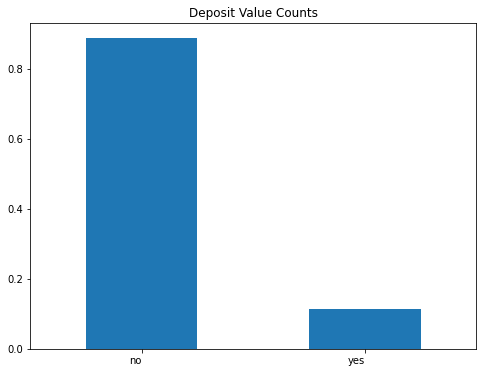

In [ ]:
#plotting the target variable
plt.figure(figsize=(8,6))
ax=data['deposit'].value_counts(normalize=True).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")

plt.title("Deposit Value Counts")
plt.show()

 From the above graph there is much difference between the classes. It is clearly an unbalanced dataset

## Univariate analysis

### Categorical Variables

In [ ]:
def uniques_col(col):
    for i in col:
      print(i,':', data[i].unique())

cat_cols=data.columns[np.where(data.dtypes=='object')]
uniques_col(cat_cols)

job : ['salaried' 'retired' 'unemployed' 'self-employed' 'unknown' 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['primary' 'secondary' 'tertiary' 'unknown' 'illiterate']
credit_default : ['no' 'unknown' 'yes']
housing_loan : ['no' 'yes' 'unknown']
personal_loan : ['no' 'yes' 'unknown']
last_contacted_month : ['may-aug' 'sep-dec' 'jan-april']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
days_passed : ['never_contacted' 'recent']
contacts_before_campaign : ['0' '<10']
deposit : ['no' 'yes']


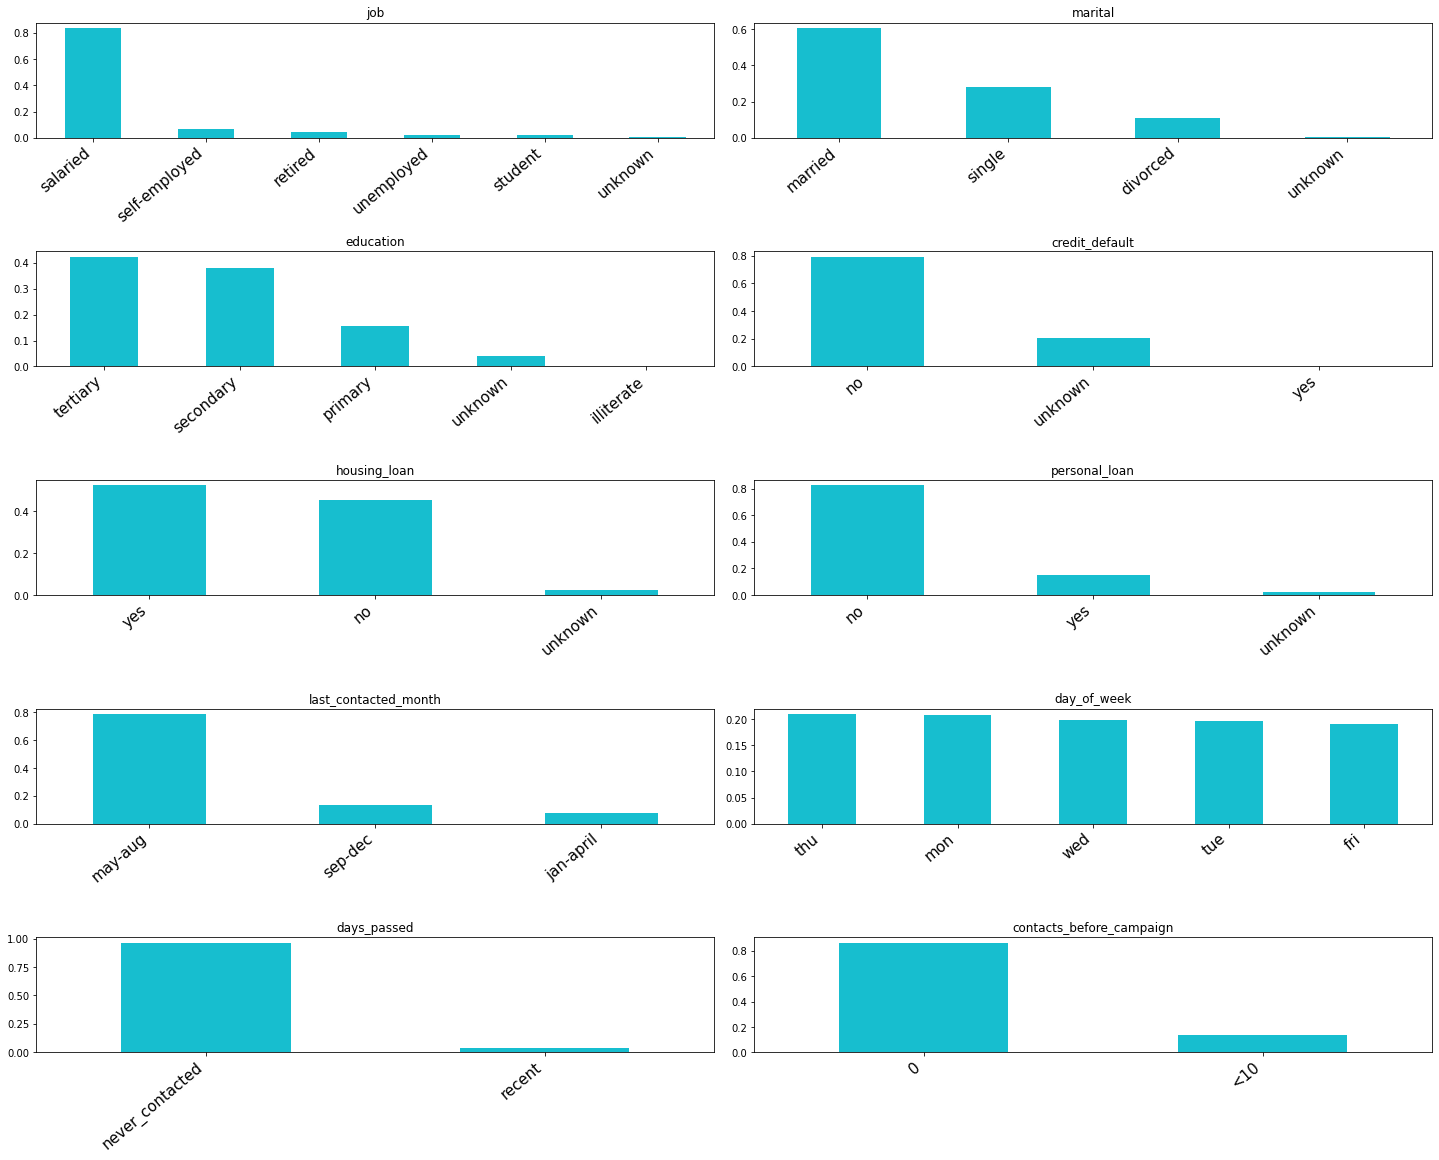

In [ ]:
#plot the categorical variables
plt.figure(figsize=(20,18), facecolor='white')
plotnumber = 1

for column in cat_cols:
    if plotnumber<=10 :
        ax = plt.subplot(6,2,plotnumber)
        data[column].value_counts(normalize=True).plot.bar(title=column,rot=1,color='tab:cyan')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Inference

<!-- * Compared to previous campaign, recent campaign has a better success rate - there is an increase of around 40% in deposits -->
* Most calls where made in the month of May
* Around 50% of the customers have housing loan whereas only around 15% of them have personal loan
* Bank has contacted most of the customers between May and August
  





## Numerical variables

In [ ]:
num_cols=data.columns[np.where((data.dtypes=='int') | (data.dtypes=='float' ))]
num_cols

Index(['age', 'last_call_duration', 'contacts_during_camapign'], dtype='object')

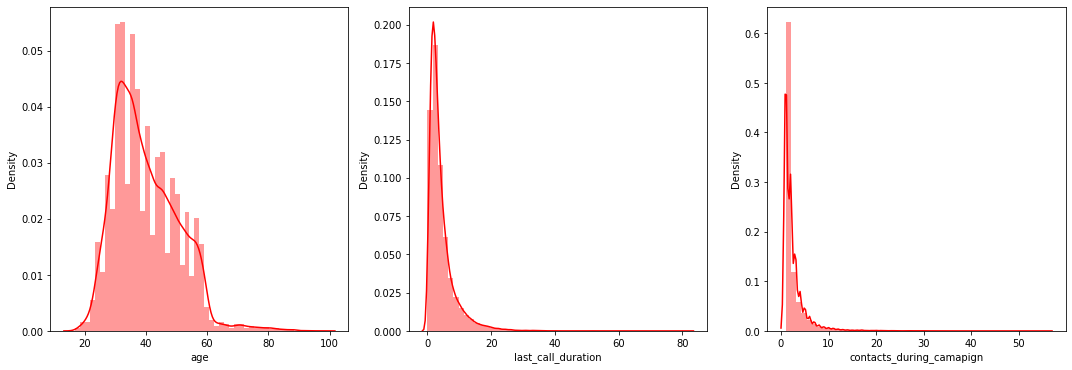

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in num_cols:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)  
        sns.distplot(data[column],kde=True,color="Red")
        #plt.xlabel(column,fontsize=12)
        #plt.ylabel("")
    plotnumber+=1
plt.tight_layout()
plt.show()




In [ ]:
#checking the skewness, if >0 -right skewed,=0 - normally distirbuted,<0 - left skewed
data.skew()

age                         0.784697
last_call_duration          3.263156
contacts_during_camapign    4.762507
dtype: float64

## Inference

* Few columns have positive skewness which will be taken care of in the feature engg part
* Bank has not contacted the customers throughout, before and during  the campaign
* The Age of customers range from  18 to 95 years old.But majority of customers contacted are  30s and 50s years old (fall within the 25th to 75th percentiles).The distribution of customer age is fairly normal with a small standard deviation


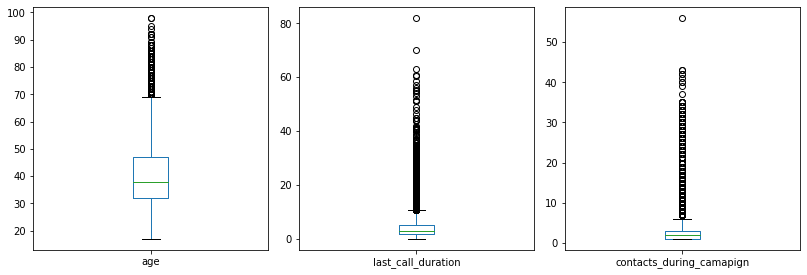

In [ ]:
##plt.figure(figsize=(1,16), facecolor='white')
plotnumber = 1

plt.figure(figsize=(20,16), facecolor='white')
for column in num_cols:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        data[column].plot.box(figsize=(15,15))
#         plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Treating Outliers

In [ ]:
# q = data['age'].quantile(0.97)
# # we are removing the top 3% data from the age column
# data_cleaned  = data[data['age']<q]


# q = data_cleaned['last_call_duration'].quantile(0.95)
# # we are removing the top 5% data from the last_call_durationn column
# data_cleaned  = data_cleaned[data_cleaned['last_call_duration']<q]

# q = data_cleaned['contacts_during_camapign'].quantile(0.95)
# # we are removing the top 5% data from the contacts_during_campaign column
# data_cleaned  = data_cleaned[data_cleaned['contacts_during_camapign']<q]



In [ ]:
# checking for outliers
data_cleaned.skew()

age                         0.335772
last_call_duration          1.218304
contacts_during_camapign    1.306626
dtype: float64

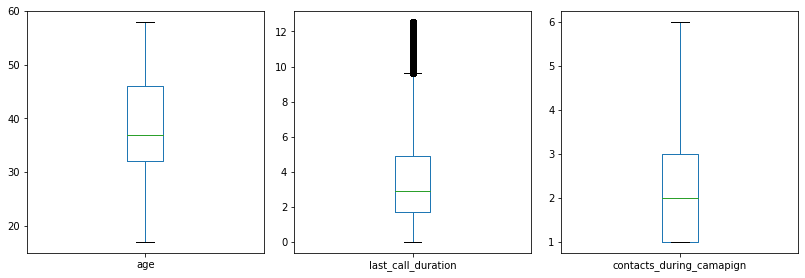

In [ ]:
##plt.figure(figsize=(1,16), facecolor='white')
plotnumber = 1

plt.figure(figsize=(20,16), facecolor='white')
for column in num_cols:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        data_cleaned[column].plot.box(figsize=(15,15))
#         plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
#QQplot for outlier check
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

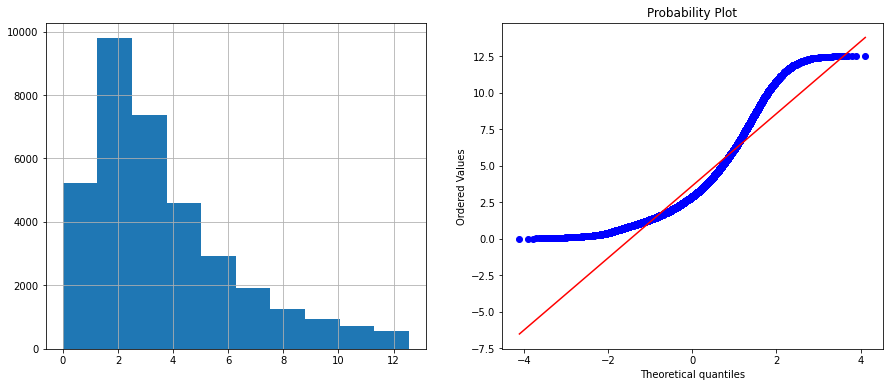

In [ ]:
diagnostic_plots(data_cleaned,'last_call_duration')

### Removing skewness by applying log transformation


In [ ]:
# def log_transform(x):
#   data_cleaned[x]=np.log(data_cleaned[x]+10)
#   return data_cleaned

# for i in ['age', 'last_contacted_day', 'last_call_duration',
#        'contacts_during_camapign', 'days_passed', 'contacts_before_campaign']:
#   data_cleaned=log_transform(i)
# data_cleaned

# data_cleaned['account_balance']=np.log(data_cleaned['account_balance']+10000)



In [ ]:
def log_transform(x):
  data[x]=np.log(data[x]+10)
  return data

for i in ['age', 'last_call_duration',
       'contacts_during_camapign']:
  data=log_transform(i)
data

data['account_balance']=np.log(data['account_balance']+10000)

KeyError: ignored

In [ ]:
num_cols

Index(['age', 'last_call_duration', 'contacts_during_camapign'], dtype='object')

In [ ]:
data_cleaned['contacts_before_campaign']

0          0
1          0
2          0
3          0
4          0
        ... 
41181      0
41182    <10
41184      0
41185      0
41186      0
Name: contacts_before_campaign, Length: 35319, dtype: object

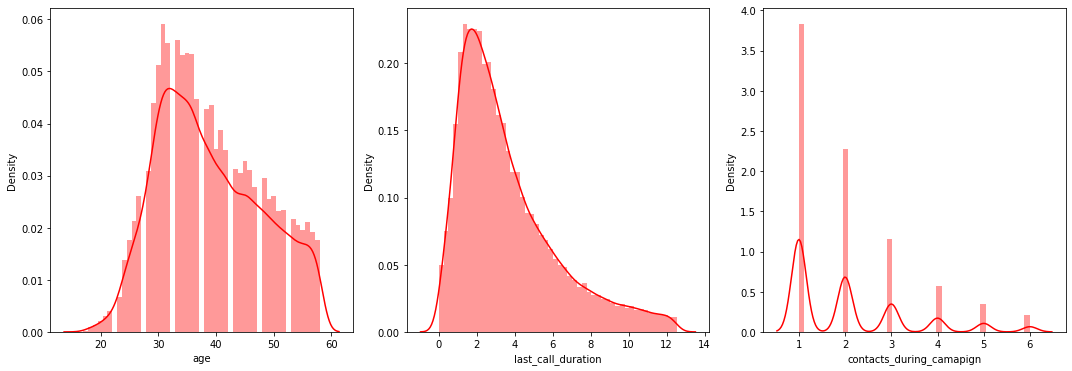

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in num_cols:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)  
        sns.distplot(data_cleaned[column],kde=True,color="Red")
        #plt.xlabel(column,fontsize=12)
        #plt.ylabel("")
    plotnumber+=1
plt.tight_layout()
plt.show()


## Bivariate analysis


**Relation between target(deposit) and categorical columns**

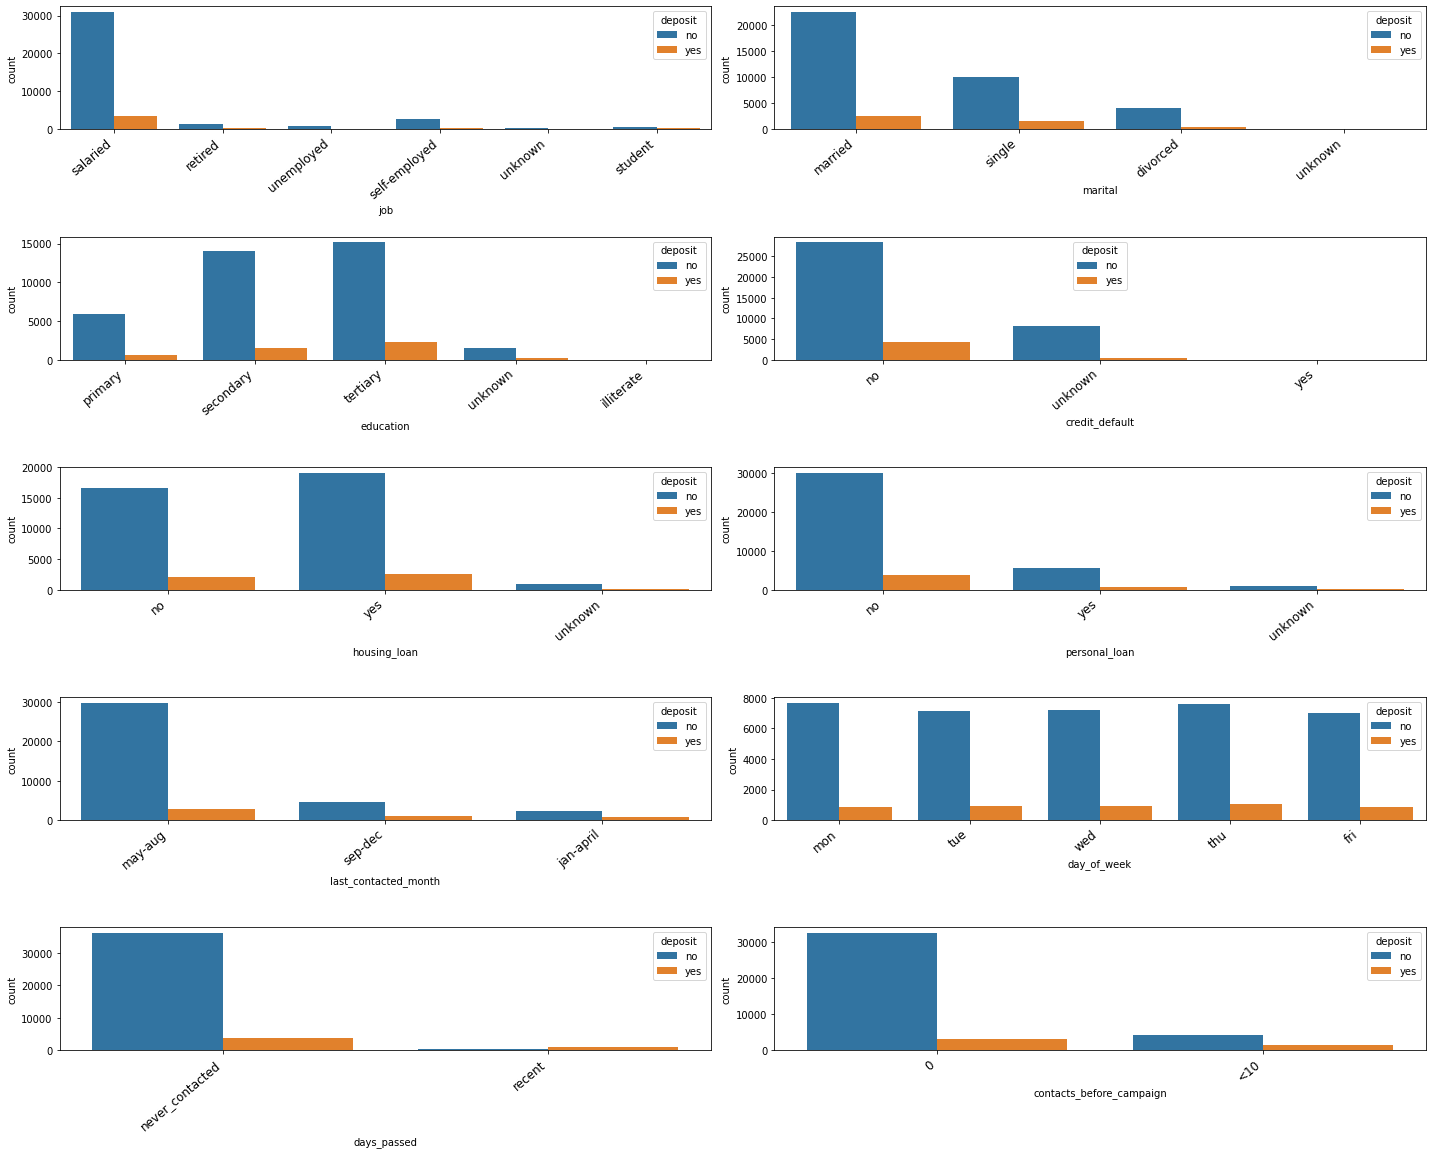

In [ ]:
plotnumber = 1

plt.figure(figsize=(20,18), facecolor='white')
for column in cat_cols:
    if plotnumber<=10 :
        ax = plt.subplot(6,2,plotnumber)
        # pd.crosstab(data[column],data['deposit'],normalize=True).plot.bar(rot=1,color=['orange','violet'],ax=ax)
        sns.countplot(x=column,data=data,hue='deposit')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)   

    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
# plotnumber = 1

# plt.figure(figsize=(20,18), facecolor='white')
# for column in cat_cols:
#     if plotnumber<=10 :
#         ax = plt.subplot(6,2,plotnumber)
#         pd.crosstab(data[column],data['deposit'],normalize=True).plot.bar(rot=1,color=['orange','violet'],ax=ax)
#         # sns.countplot(x=column,data=data,hue='deposit')
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)   

#     plotnumber+=1
# plt.tight_layout()
# plt.show()

**Inference from the bivariate analysis of categorical variables :**


* Customers with credit default do not have deposits
* It is more likely for a person without a housing loan and personal loan to start a deposit.


**Relation between target(deposit) and numerical columns**

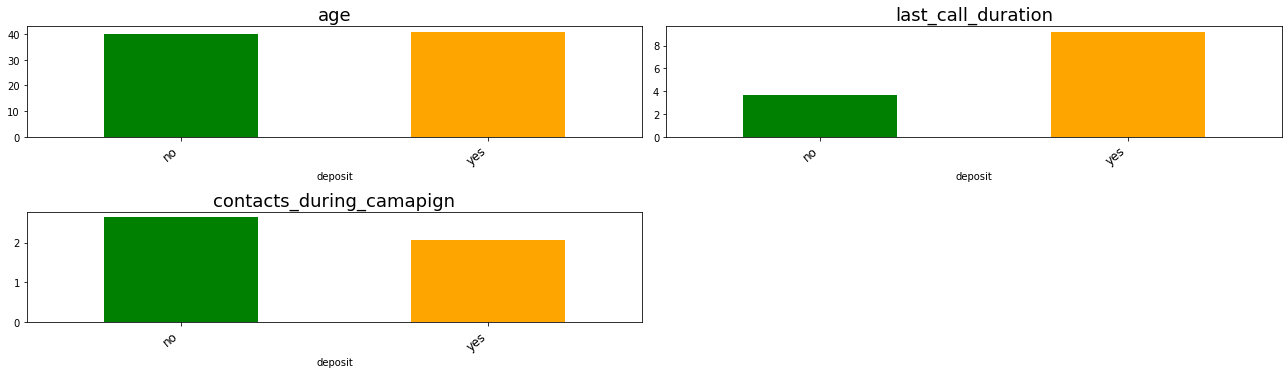

In [ ]:
plotnumber = 1

plt.figure(figsize=(18,15), facecolor='white')
for column in num_cols:
    if plotnumber<=10 :
        ax = plt.subplot(6,2,plotnumber)
        data.groupby('deposit')[column].mean().plot.bar(rot=1,color=['green','orange'],ax=ax,title=column)
        # pd.crosstab(data[column],data['deposit'],normalize=True).plot.bar(rot=1,color=['orange','violet'],ax=ax)
        # sns.countplot(x=column,data=data,hue='deposit')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)  
        ax.set_title(label=column,fontsize=18)
    plotnumber+=1
plt.tight_layout()
plt.show()

**Inference from the above analysis :**

* calls of higher duration have resulted in higher number of deposits.
* customers with higher account balance are likely to open a term deposit account


## Train test split

In [ ]:
#independent variables
X=data_cleaned.drop('deposit',axis=1)

#target variable
y=data_cleaned['deposit']

y.replace({'yes' : 1, 'no' : 0},regex=True, inplace=True)

#Train-test split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30,stratify=y)

In [ ]:
x_test

,age,job,marital,education,credit_default,housing_loan,personal_loan,last_contacted_month,day_of_week,last_call_duration,contacts_during_camapign,days_passed,contacts_before_campaign
3927,32,student,single,tertiary,no,no,no,may-aug,mon,4.30,1,never_contacted,0
32129,34,salaried,married,secondary,no,yes,yes,may-aug,fri,3.28,1,never_contacted,0
21431,46,salaried,married,tertiary,unknown,no,no,may-aug,tue,3.92,2,never_contacted,0
23968,45,salaried,married,tertiary,no,no,no,may-aug,fri,0.45,2,never_contacted,0
5133,42,salaried,divorced,primary,no,no,no,may-aug,fri,3.85,1,never_contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,40,salaried,married,tertiary,no,yes,no,jan-april,thu,9.67,2,recent,<10
8657,40,salaried,married,primary,no,no,no,may-aug,wed,1.15,1,never_contacted,0
19297,37,salaried,single,tertiary,no,no,no,may-aug,wed,5.68,1,never_contacted,0
25865,55,salaried,divorced,secondary,no,no,no,sep-dec,wed,1.12,3,never_contacted,0


## Feature Importance

In [ ]:
x_new=pd.get_dummies(x_train,drop_first=True)
x_new

,age,last_call_duration,contacts_during_camapign,job_salaried,job_self-employed,job_student,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_primary,education_secondary,education_tertiary,education_unknown,credit_default_unknown,credit_default_yes,housing_loan_unknown,housing_loan_yes,personal_loan_unknown,personal_loan_yes,last_contacted_month_may-aug,last_contacted_month_sep-dec,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,days_passed_recent,contacts_before_campaign_<10
192,45,0.32,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
33249,36,2.80,5,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
35391,40,2.22,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
37074,38,1.07,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0
1771,34,3.73,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,51,7.47,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
40854,42,11.30,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
6938,41,0.62,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
21398,37,2.63,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
# Important feature using ExtraTreesRegressor


from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_new, y_train)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[0.14942349 0.25846179 0.0760055  0.01517369 0.0106386  0.00878111
 0.00681695 0.00261969 0.02310016 0.02055953 0.0008085  0.01172552
 0.01671369 0.01928465 0.00802544 0.01346496 0.         0.00336734
 0.04063493 0.00362234 0.02605777 0.02423713 0.01437512 0.02162775
 0.02404013 0.02458136 0.02321696 0.13343841 0.01919749]


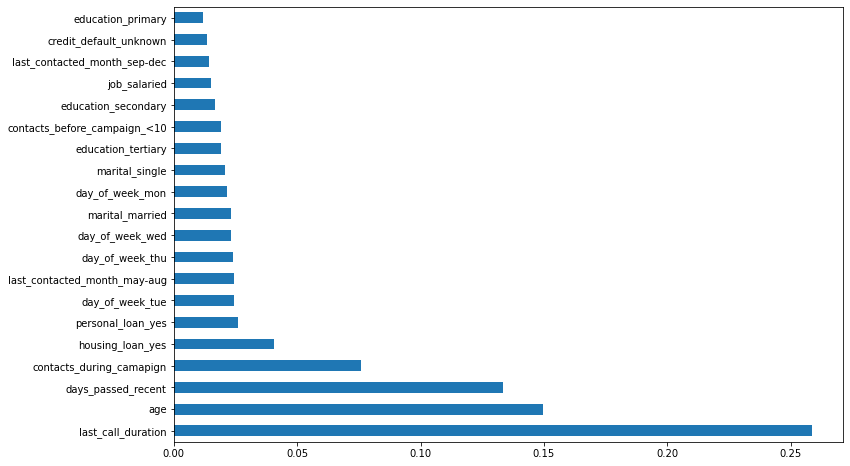

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index=x_new.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Transformation pipelines

In [ ]:
cat_cols

Index(['job', 'marital', 'education', 'credit_default', 'housing_loan',
       'personal_loan', 'last_contacted_month', 'day_of_week', 'days_passed',
       'contacts_before_campaign', 'deposit'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



#for numerical varibles
x_train_num=x_train[num_cols]

num_pipeline=Pipeline([
                       ('std_scaler',StandardScaler()),
                      
                      ])

x_train_num_prepared=num_pipeline.fit_transform(x_train_num)

#for categorical variables

cat_cols_for_train=['job', 'marital', 'education', 'credit_default', 'housing_loan',
       'personal_loan', 'last_contacted_month', 'day_of_week', 'days_passed',
       'contacts_before_campaign']
x_train_cat=x_train[cat_cols_for_train]
cat_pipeline=Pipeline([('encoder',OneHotEncoder())])

x_train_cat_prepared=cat_pipeline.fit_transform(x_train_cat)

# x_train_prepared=np.concatenate((x_train_num_prepared,x_train_cat_prepared.toarray()),axis=1)

from sklearn.compose import ColumnTransformer

num_attribs=list(x_train_num)
cat_attribs=list(x_train_cat)

full_pipeline=ColumnTransformer([
                                 ('num',num_pipeline,num_attribs),
                                 ('cat',cat_pipeline,cat_attribs),
])

x_train_prepared=full_pipeline.fit_transform(x_train)

In [ ]:
x_train_prepared.shape

(24723, 39)

In [ ]:
#preparing the test data

x_test_prepared=full_pipeline.transform(x_test)
x_test_prepared_df=pd.DataFrame(x_test_prepared)
x_test_prepared_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-0.761979,0.254456,-0.814632,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.540546,-0.135103,-0.814632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.788051,0.109326,-0.038518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.677335,-1.215938,-0.038518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.345186,0.082592,-0.814632,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,0.123753,2.305370,-0.038518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10592,0.123753,-0.948594,-0.814632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
10593,-0.208397,0.781506,-0.814632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
10594,1.784499,-0.960052,0.737595,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
call duration

## Modeling

In [ ]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [ ]:
models = {}

# models with default parameter
# models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
# models['AdaBoost'] = AdaBoostClassifier()
models['XGBoost'] = XGBClassifier()
models['SVM'] = SVC()
models['KNN'] = KNeighborsClassifier()
# models['Naive_Bayes'] = GaussianNB()

# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, x_train_prepared, y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

RandomForest:
Accuracy: train:  0.999989888265332 | test:  0.9248472927117385
F1-score: train:  0.9999398857829878 | test:  0.3840769758842564
---------------------------------------------------------
XGBoost:
Accuracy: train:  0.9307021795001006 | test:  0.928770766456916
F1-score: train:  0.40141984001596587 | test:  0.38407180792234125
---------------------------------------------------------
SVM:
Accuracy: train:  0.929347167176162 | test:  0.9269910193356697
F1-score: train:  0.36541054627425973 | test:  0.3438201592022851
---------------------------------------------------------
KNN:
Accuracy: train:  0.9377401605364927 | test:  0.9225823786571379
F1-score: train:  0.49583801887014367 | test:  0.3621657361372365
---------------------------------------------------------


Modeling Part 1

## SMOTE

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_prepared_ns,y_train_ns=os.fit_sample(x_train_prepared,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

x_test_prepared_ns,y_test_ns=os.fit_sample(x_test_prepared,y_test)

The number of classes before fit Counter({0: 22643, 1: 2080})
The number of classes after fit Counter({0: 22498, 1: 16837})


In [ ]:
models = {}

# models with default parameter
# models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
# models['AdaBoost'] = AdaBoostClassifier()
models['XGBoost'] = XGBClassifier()
models['SVM'] = SVC()
models['KNN'] = KNeighborsClassifier()
# models['Naive_Bayes'] = GaussianNB()

# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, x_train_prepared_ns, y_train_ns, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

RandomForest:
Accuracy: train:  1.0 | test:  0.9528155586627685
F1-score: train:  1.0 | test:  0.9424769179482475
---------------------------------------------------------
XGBoost:
Accuracy: train:  0.9095906953095207 | test:  0.9022499046650566
F1-score: train:  0.8946226711235802 | test:  0.8829047734459774
---------------------------------------------------------
SVM:
Accuracy: train:  0.8969047921698234 | test:  0.886055675606966
F1-score: train:  0.8803433674278729 | test:  0.866946619475981
---------------------------------------------------------
KNN:
Accuracy: train:  0.9365196389983476 | test:  0.9093174018050082
F1-score: train:  0.9304617213501961 | test:  0.9026616452598113
---------------------------------------------------------


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Random Forest

In [ ]:
rand_clf = RandomForestClassifier()

In [ ]:
random_param = {
    "n_estimators" : range(10,130,20),
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
rand_search = RandomizedSearchCV(rand_clf,random_param,n_jobs =-1,verbose = 3)
rand_search.fit(x_train_prepared_ns, y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.6s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
rand_search.best_params_

{'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 30}

In [ ]:
rand_clf = RandomForestClassifier(max_depth = 14,
 max_features = 'auto',
 min_samples_leaf = 7,
 min_samples_split= 3,
 n_estimators = 30)

In [ ]:
rand_clf.fit(x_train_prepared_ns,y_train_ns)
rnd_pred=rand_clf.predict(x_test_prepared_ns)

print(accuracy_score(rnd_pred,y_test_ns))
f1_score(rnd_pred,y_test_ns)

0.8933514728498758


0.8721729883020205

## XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
random_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [ ]:
rand_search= RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),random_grid, verbose=3)
rand_search.fit(x_train_prepared_ns,y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, max_depth=3,  learning_rate=1 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=3,  learning_rate=1, score=0.835, total=   2.8s
[CV] n_estimators=100, max_depth=3,  learning_rate=1 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3,  learning_rate=1, score=0.919, total=   2.7s
[CV] n_estimators=100, max_depth=3,  learning_rate=1 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3,  learning_rate=1, score=0.924, total=   2.7s
[CV] n_estimators=100, max_depth=3,  learning_rate=1 .................
[CV]  n_estimators=100, max_depth=3,  learning_rate=1, score=0.915, total=   2.7s
[CV] n_estimators=100, max_depth=3,  learning_rate=1 .................
[CV]  n_estimators=100, max_depth=3,  learning_rate=1, score=0.919, total=   2.7s
[CV] n_estimators=10, max_depth=10,  learning_rate=0.01 ..............
[CV]  n_estimators=10, max_depth=10,  learning_rate=0.01, score=0.849, total=   1.3s
[CV] n_estimators=10, max_depth=10,  learning_rate=0.01 ..............
[CV]  n_estimators=10, max_depth=10,  learning_rate=0.01, score=0.895, total=   1.2s
[CV] n_estimators=10, max_depth=10,  learning_rate=0.01 ..............
[CV]  n_estimators=10, max_depth=10,  learning_rate=0.01, score=0.905, total=   1.3s
[CV] n_estimators=10, max_depth=10,  learning_rate=0.01 ..............
[CV]  n_estimators=10, max_depth=10,  learning_rate=0.01, score=0.894, to

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid=

In [ ]:
# To  find the parameters givingmaximum accuracy
rand_search.best_params_

{' learning_rate': 1, 'max_depth': 20, 'n_estimators': 100}

In [ ]:
# Create new model using the same parameters
xgb_clf=XGBClassifier(n_estimators = 200,learning_rate=0.5,max_depth=20)
xgb_clf.fit(x_train_prepared_ns,y_train_ns)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(xgb_clf, open(filename, 'wb'))


In [ ]:
xgb_pred=xgb_clf.predict(x_test_prepared_ns)
print(accuracy_score(xgb_pred,y_test_ns))
f1_score(xgb_pred,y_test_ns)

0.9278362711463386


0.912794853466762

## SVM

In [ ]:
svm_clf = svm.SVC()

In [ ]:
random_grid = [
  {'C': [1, 5, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf','sigmoid']},
 ]

In [ ]:
rand_search=RandomizedSearchCV(svm_clf,random_grid, n_jobs=-1)


In [ ]:
rand_search.fit(x_train_prepared_ns,y_train_ns)

In [ ]:
rand_search.best_params_

In [ ]:
# svm_clf = SVC(C=10, 
              # gamma= 0.01, kernel= 'rbf')
svm_clf = SVC(C=1000, 
              gamma= 0.001, kernel= 'rbf')

In [ ]:
svm_clf.fit(x_train_prepared_ns,y_train_ns)

In [ ]:
svm_pred=svm_clf.predict(x_test_prepared_ns)
print(accuracy_score(svm_pred,y_test_ns))
f1_score(svm_pred,y_test_ns)

# KNN

In [ ]:
knn=KNeighborsClassifier()
random_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [32,34,36,8,40,42,44,46],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [ ]:
rand_search = RandomizedSearchCV(knn, random_grid,verbose=3)


In [ ]:
rand_search.fit(x_train_prepared_ns, y_train_ns)

In [ ]:
rand_search.best_params_

In [ ]:
rand_clf = rand_search.best_params_

In [ ]:
filename = 'randomforest_model.pickle'
pickle.dump(rand_clf, open(filename, 'wb'))

In [ ]:
# we will use the best parameters in our Knn algorithm and check if accuracy is increasing.
knn_clf= KNeighborsClassifier(algorithm = 'brute', leaf_size =46, n_neighbors=3)

In [ ]:
knn.fit(x_train_prepared_ns,y_train_ns)
knn_pred=knn.predict(x_test_prepared_ns)

print(accuracy_score(svm_pred,y_test_ns))
f1_score(svm_pred,y_test_ns)

## Saving the models

In [ ]:
import pickle

filename = 'randomforest_model4.pickle'
pickle.dump(rand_clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
filename = 'xgboost_model.pickle'
pickle.dump(xgb_clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
filename = 'svm_model.pickle'
pickle.dump(svm_clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
filename = 'knn_model.pickle'
pickle.dump(knn_clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))